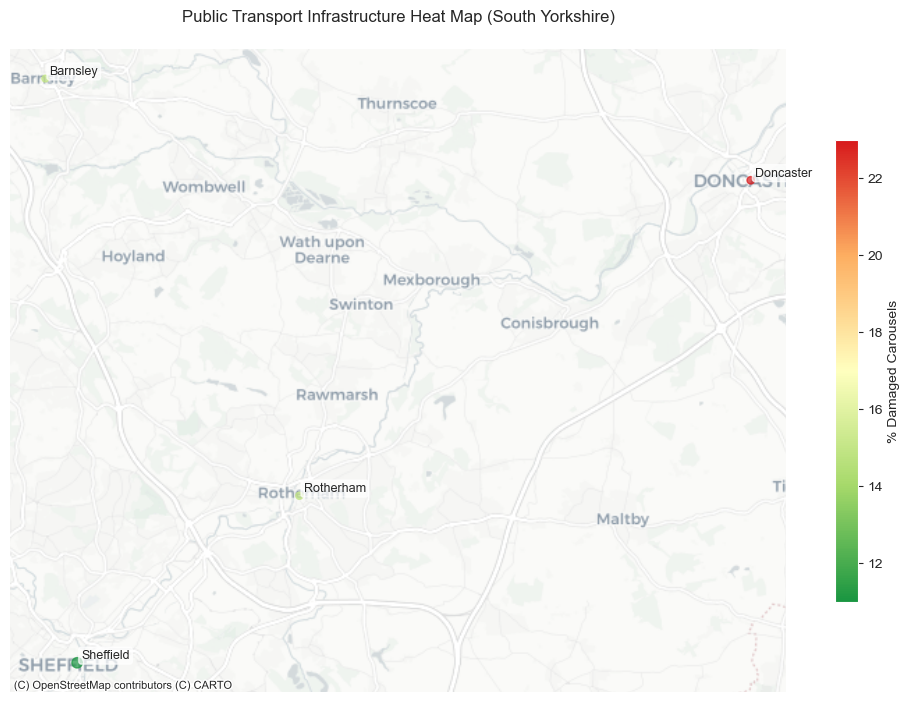

In [4]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.colors import LinearSegmentedColormap

# Your data (with fictional coordinates for demo)
data = {
    "Council Area": ["Barnsley", "Doncaster", "Rotherham", "Sheffield"],
    "Bus stops": [1214, 1455, 1346, 2812],
    "Average Buses Per Hour": [3.0, 3.2, 2.8, 4.9],
    "% Damaged Carousels": [15, 23, 15, 11],
    "geometry": [
        "POINT (-1.4816 53.5526)",  # Approx coordinates
        "POINT (-1.1337 53.5228)",
        "POINT (-1.3563 53.4302)",
        "POINT (-1.4659 53.3811)"
    ]
}

# Convert to GeoDataFrame
df = pd.DataFrame(data)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df["geometry"]), crs="EPSG:4326")

# Reproject to Web Mercator (for contextily basemap)
gdf = gdf.to_crs(epsg=3857)

# Normalize a metric (e.g., "% Damaged Carousels" for the heatmap)
gdf["normalized_damage"] = (gdf["% Damaged Carousels"] - gdf["% Damaged Carousels"].min()) /(gdf["% Damaged Carousels"].max() - gdf["% Damaged Carousels"].min())

# Custom color map (red = high damage)
colors = ["#1a9641", "#a6d96a", "#ffffbf", "#fdae61", "#d7191c"]  # Green to Red
cmap = LinearSegmentedColormap.from_list("custom", colors, N=256)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    ax=ax,
    markersize=gdf["Bus stops"] / 50,  # Scale marker size by bus stops
    column="% Damaged Carousels",
    cmap=cmap,
    alpha=0.7,
    legend=True,
    legend_kwds={"label": "% Damaged Carousels", "shrink": 0.6}
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Annotations
for idx, row in gdf.iterrows():
    ax.annotate(
        text=row["Council Area"],
        xy=(row.geometry.x, row.geometry.y),
        xytext=(3, 3),
        textcoords="offset points",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7)
    )

plt.title("Public Transport Infrastructure Heat Map (South Yorkshire)", pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()

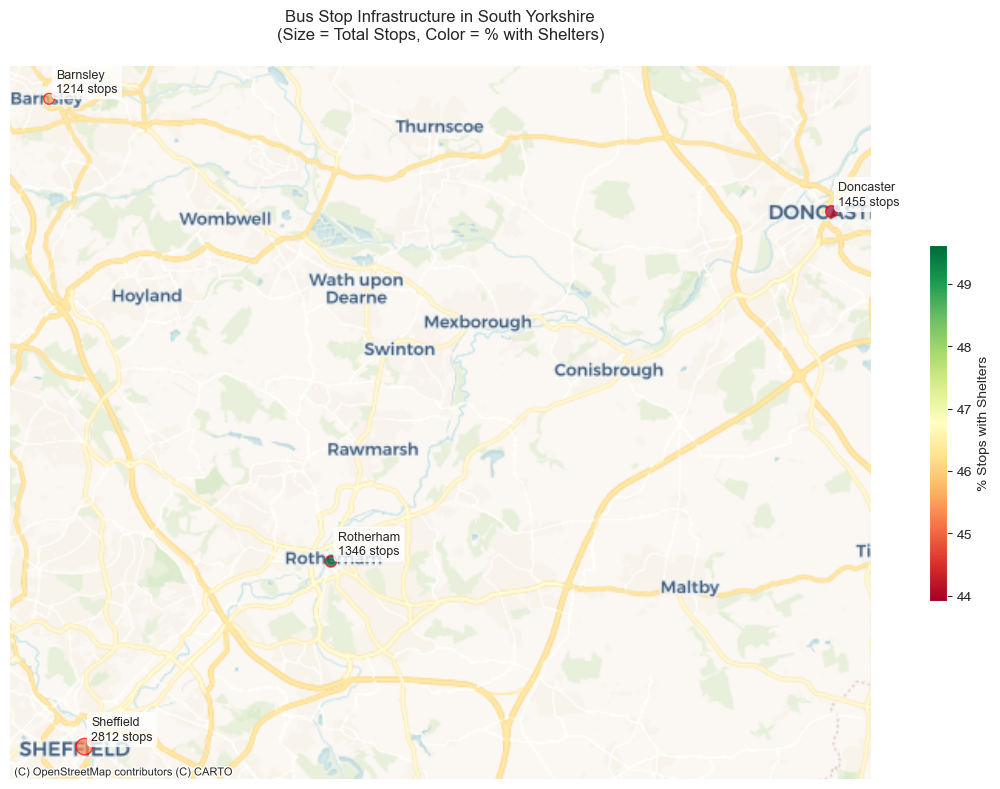

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Your data (with bus stop metrics only)
data = {
    "Council Area": ["Barnsley", "Doncaster", "Rotherham", "Sheffield"],
    "Bus stops": [1214, 1455, 1346, 2812],
    "Stops with Shelters": [554, 639, 668, 1273],
    "Stops with Screens": [205, 205, 205, 276],
    "Damaged Carousels": [177, 338, 203, 318],
    "geometry": [  # Approximate coordinates
        "POINT (-1.4816 53.5526)",  # Barnsley
        "POINT (-1.1337 53.5228)",  # Doncaster
        "POINT (-1.3563 53.4302)",  # Rotherham
        "POINT (-1.4659 53.3811)"   # Sheffield
    ]
}

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.GeoSeries.from_wkt(data["geometry"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)  # Convert to Web Mercator

# Calculate percentages
gdf["% Shelters"] = (gdf["Stops with Shelters"] / gdf["Bus stops"]) * 100
gdf["% Screens"] = (gdf["Stops with Screens"] / gdf["Bus stops"]) * 100
gdf["% Damaged"] = (gdf["Damaged Carousels"] / gdf["Bus stops"]) * 100

# Plot
fig, ax = plt.subplots(figsize=(12, 8))

# Bubble map: Size = Bus stops, Color = % Shelters
scatter = gdf.plot(
    ax=ax,
    markersize=gdf["Bus stops"] / 20,  # Scale by total stops
    column="% Shelters",
    cmap="RdYlGn",  # Red (low) -> Green (high)
    alpha=0.7,
    edgecolor="red",
    legend=True,
    legend_kwds={"label": "% Stops with Shelters", "shrink": 0.5}
)

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.)  # Brighter than Positron

# Labels
for idx, row in gdf.iterrows():
    ax.annotate(
        text=f"{row['Council Area']}\n{row['Bus stops']} stops",
        xy=(row.geometry.x, row.geometry.y),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8)
    )

plt.title("Bus Stop Infrastructure in South Yorkshire\n(Size = Total Stops, Color = % with Shelters)", pad=20)
plt.axis("off")
plt.tight_layout()
plt.show()

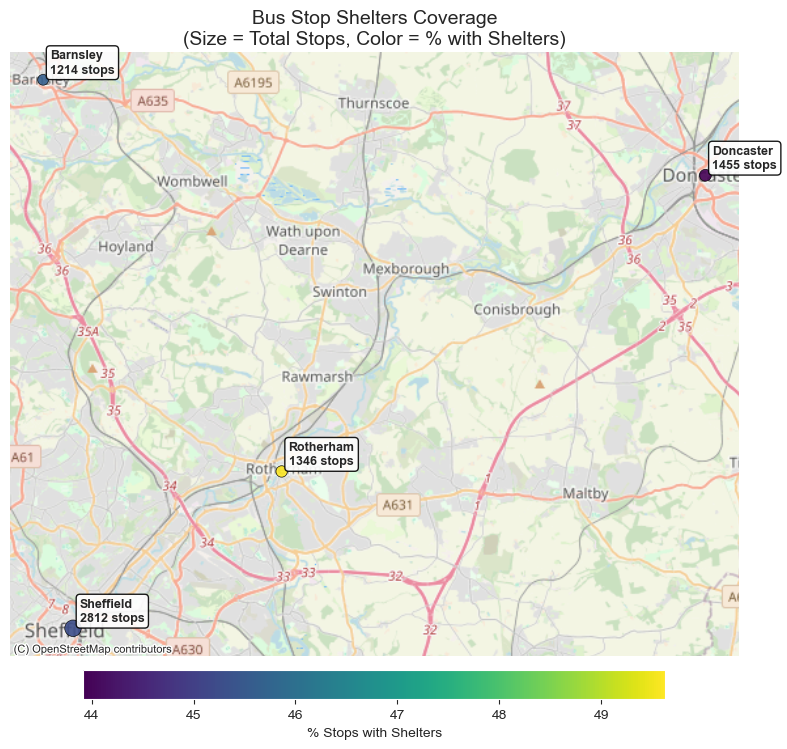

In [10]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

# Your data
data = {
    "Council Area": ["Barnsley", "Doncaster", "Rotherham", "Sheffield"],
    "Bus stops": [1214, 1455, 1346, 2812],
    "Stops with Shelters": [554, 639, 668, 1273],
    "geometry": [
        "POINT (-1.4816 53.5526)",  # Barnsley
        "POINT (-1.1337 53.5228)",  # Doncaster
        "POINT (-1.3563 53.4302)",  # Rotherham
        "POINT (-1.4659 53.3811)"   # Sheffield
    ]
}

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.GeoSeries.from_wkt(data["geometry"]),
    crs="EPSG:4326"
).to_crs(epsg=3857)  # Web Mercator

# Calculate % shelters
gdf["% Shelters"] = (gdf["Stops with Shelters"] / gdf["Bus stops"]) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Bubble map: Size = Bus stops, Color = % Shelters
gdf.plot(
    ax=ax,
    markersize=gdf["Bus stops"] / 20,
    column="% Shelters",
    cmap="viridis",  # Bright & colorblind-friendly
    alpha=0.9,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    legend_kwds={
        "label": "% Stops with Shelters",
        "shrink": 0.6,
        "orientation": "horizontal",
        "pad": 0.02
    }
)

# Add reliable basemap (CartoDB Positron or OpenStreetMap)
try:
    ctx.add_basemap(
        ax,
        source=ctx.providers.OpenStreetMap.Mapnik,  # Fallback option
        alpha=0.8
    )
except Exception as e:
    print(f"Basemap error: {e}. Using OpenStreetMap as fallback.")
    ctx.add_basemap(
        ax,
        source=ctx.providers.OpenStreetMap.Mapnik,  # Fallback option
        alpha=0.8
    )

# Labels
for idx, row in gdf.iterrows():
    ax.annotate(
        text=f"{row['Council Area']}\n{row['Bus stops']} stops",
        xy=(row.geometry.x, row.geometry.y),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=9,
        fontweight="bold",
        bbox=dict(
            boxstyle="round,pad=0.3",
            fc="white",
            ec="black",
            alpha=0.9
        )
    )

plt.title("Bus Stop Shelters Coverage\n(Size = Total Stops, Color = % with Shelters)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.show()

In [16]:
import pandas as pd

# Load your data (replace with your file)
df = pd.read_csv("cleaned_data_csv.csv")

# Key metrics by area/category
insights = {
    "Top Boarding Stops": df.nlargest(5, "Boardings Per Month")[["stop_name", "Boardings Per Month"]],
    "Most Damaged Stops": df[df["Damaged"] == True]["stop_name"].value_counts().head(5),
    "Shelter Coverage": df["Shelter?"].value_counts(normalize=True) * 100,
    "Realtime Availability": df["Realtime?"].value_counts(normalize=True) * 100,
    "Avg Boardings/Hour by Ward": df.groupby("ward")["Boardings Per Hour"].mean().sort_values(ascending=False).head(5)
}

for name, result in insights.items():
    print(f"=== {name} ===")
    print(result, "\n")
    
    import geopandas as gpd
import contextily as ctx

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)


# Group by ward/district
infra_quality = df.groupby("ward").agg({
    "Shelter?": "mean",
    "Realtime?": "mean",
    "Damaged": "mean",
    "Boardings Per Hour": "median"
}).sort_values("Boardings Per Hour", ascending=False)

print(infra_quality.head())

=== Top Boarding Stops ===
                          stop_name  Boardings Per Month
0  Worsbrough Road/Coronation Drive                    0
1        Wood Walk/Wombwell Station                    0
2          Wombwell Lane/Caulk Lane                    0
3     Wombwell Lane/Bleachcroft Way                    0
4      Wilthorpe Road/Wilbrook Rise                    0 

=== Most Damaged Stops ===
stop_name
Wakefield Road/Smithies Lane                          2
Park Spring Road/Houghton Main Colliery Roundabout    2
Wilthorpe Road/Wilbrook Rise                          1
Merrill Road/Challenger Crescent                      1
Cross Lane/East End Crescent                          1
Name: count, dtype: int64 

=== Shelter Coverage ===
Shelter?
1    100.0
Name: proportion, dtype: float64 

=== Realtime Availability ===
Realtime?
0    79.508197
1    20.491803
Name: proportion, dtype: float64 

=== Avg Boardings/Hour by Ward ===
ward
Central Ward      0.0
Darfield Ward     0.0
Wombwell Ward  